In [ ]:
<img src='..//resources/waste-treatment-processes.jpg'>

# Waste Management EDA proyect

#### Hypothesis
##### "The development of societies and population growth, among other things, influence the increase in municipal solid waste generation.  The world's population is growing by leaps and bounds, projected to reach 8.5 billion by 2030, 9.7 billion by 2050 and 11.2 billion by 2100 (United Nations, 2019).Similarly, global environmental indicators show that more waste is being generated over time, creating environmental problems in urban ecosystems, especially because of the challenge faced by governments in the management and disposal of such waste. According to a report presented by the World Bank in 2017 (2018), 2010 million tonnes of MSW are generated annually in the world, and an important fact to highlight is that at least 33% of this waste is managed at risk to the environment. Therefore, the hypothesis of this project is: Population growth and economic development generate an increase in the production of solid waste."

## 1. Data Sourcing
#### Data Sourcing is the process of finding and loading the data into our system. For this project, the data submitted by the INE have been used, which are considered public data. 

https://www.ine.es/

## 2. Imports the required libraries for EDA
#### First of all, import the needed libraries.Common data science functions have been used: numpy, pandas, matplotlib.

In [1]:
import matplotlib.pyplot as plt

In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import re 

# File system manangement
import matplotlib.pyplot as plt

# Necessary command
from utils.mining_data_tb import *
from utils.visualization_tb import *

# matplotlib and seaborn for plotting

import seaborn as sns
%matplotlib inline 



## 3. Load the data into the data frame.
#### Loading the data into the pandas data frame is certainly one of the most important steps in EDA. First, we can list all the available data files. There are a total of 5 files. 3 files representing waste management: 1 file with information on waste generation, 1 file on waste disposal, 1 file on emissions produced by waste management. And 2 files to contrast the previous variables: 1 on the Spanish economy (GDP) and 1 on the population. 

In [3]:
# List files available
print(os.listdir("../data/"))


['PIBcorriente_milesdeeuros.xlsx', 'poblacion.xls', 'recogida_residuos.xlsx', 'residuos_gestionados_nuevo.xlsx', 'total contaminantes nacional.xlsx', 'waste_management_cleaned.csv', 'waste_management_cleaned.xlsx']


In [4]:
# Read databases
gdp, disposal, population, collection = read_databases()


# Load into dataframes
gdp = pd.read_excel(gdp)
population = pd.read_excel(population)
waste_disposal = pd.read_excel(disposal)
waste_collection = pd.read_excel(collection)



## 4. Basic Data Exploration
#### In this step, it will be checked what the datasets are composed.  As they are different databases, they have different formats and types of objects. 

In [5]:
gdp.head(3)

,Comunidad Autónoma,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ANDALUCÍA,86568676,93709992,100949639,109668109,118493081,128578073,138535591,148025809,151226849,144878289,144752225,143389086,138007226,136048003,137722026,144745569,148405362,155371755,160711363
1,ARAGÓN,20071592,21577543,23368239,24975186,26638692,28663286,31098276,33853480,35141063,33564425,33828995,33368344,31963049,32082809,32289054,32876311,34214691,35638352,36850296
2,PRINCIPADO DE ASTURIAS,14305047,15409649,16299205,17208849,18299196,19843031,21562413,23105938,23844408,22541896,22733586,22375426,21364846,20746770,20652899,21372587,21694246,22592548,23258673


In [6]:
population.head(3)

,Comunidad Autónoma,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996
0,ANDALUCÍA,8384408,8379820,8388107,8399043,8402305,8440300,8449985,8424102,8370975,...,7849799,7687518,7606848,7478432,7403968,7340052,7305117,7236459,,7234873
1,ARAGÓN,1308728,1308750,1308563,1317847,1325385,1347150,1349467,1346293,1347095,...,1269027,1249584,1230090,1217514,1199753,1189909,1186849,1183234,,1187546
2,PRINCIPADO DE ASTURIAS,1028244,1034960,1042608,1051229,1061756,1068165,1077360,1081487,1084341,...,1076635,1073761,1075381,1073971,1075329,1076567,1084314,1081834,,1087885


In [7]:
waste_disposal.head(3)

,Año,Comunidades Autónomas,Reciclado procedente de recogida separada,Materiales recuperados-TMB mezclados,Compostado/Digestion anaerobia de FORS,Compostado/Digestión anaerobia,Incinerado,Vertido de rechazos,Vertido sin tratamiento previo,Total,Unnamed: 10
0,2018,Andalucía,412818.0,166217.0,45572.0,685734.0,0.0,2404796.0,599650.0,4314787.0,NaN
1,2018,Aragón,82418.0,10209.0,212000.0,79834.0,0.0,172831.0,226741.0,572245.0,NaN
2,2018,Principado de Asturias,83728.0,0.0,2481.0,0.0,0.0,4908.0,390873.0,481990.0,NaN


In [8]:
waste_collection.head(3)

,,2018,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,...,2010.7,2010.8,2010.9,2010.10,2010.11,2010.12,2010.13,2010.14,2010.15,2010.16
0,,Andalucía,Aragón,Principado de Asturias,ILLES BALEARS,Canarias,Cantabria,Castilla y León,Castilla - La Mancha,Cataluña,...,Castilla - La Mancha,Cataluña,Comunitat Valenciana,Extremadura,Galicia,Comunidad de Madrid,Región de Murcia,Comunidad Foral de Navarra,País Vasco,LA RIOJA
1,10.1.1 Residuos domésticos y similares (domést...,3755593,475448,388505,672375,1128714,246839,915396,849572,2216496,...,968613,2441711,1869060,491529,1002349,2108673,711540,185635,694220,111409
2,10.1.2 Residuos domésticos voluminosos mezclad...,153300,24205,15404,65140,25440,23336,17151,9959,117245,...,31588,77627,59550,16706,23130,66879,15924,10709,24083,1276


## 5. Data Cleaning
#### After completing the Data Sourcing, the next step in the process of EDA is Data Cleaning. It is very important to get rid of the irregularities and clean the data after sourcing it into the system.
#### For the development of this project, a database cleaning is carried out independently or following patterns in databases with a similar format. To subsequently join the 5 databases.
#### * Missing Values
#### * Incorrect Format
#### * Incorrect Headers
#### * Anomalies

#### 5.1. MELT ROW INTO COLUMN 
#### For this database, it has been decided to place the years and the autonomous communities as rows, and the waste management variables will be placed as columns. The first difference is observed in the GDP and population databases. We proceed to eliminate the years that are not going to be considered in the analysis and to invert the shapes of the bases, to bring them closer to the desired format.

In [9]:

gdp, population = melt_data(gdp, population)

In [10]:

gdp.head(3)

,Comunidad Autónoma,Año,PIB
0,ANDALUCÍA,2010,144752225
102,ANDALUCÍA,2016,148405362
34,ANDALUCÍA,2012,138007226


In [11]:
population.head(3)

,Comunidad Autónoma,Año,Poblacion
0,ANDALUCÍA,2010,8370975
102,ANDALUCÍA,2016,8388107
34,ANDALUCÍA,2012,8449985


In [12]:
## WASTE COLLECTION DATA BASE CLEANED 
waste_collection = clean_collection(waste_collection)
waste_collection.head(3)

,Año,Comunidad Autónoma,Recoleccion-domésticos y vias,Recoleccion-voluminosos,Recoleccion-metálicos,Recoleccion-vidrio,Recoleccion-papel y carton,Recoleccion-plasticos,Recoleccion-madera,Recoleccion-textiles,Recoleccion-eq. electricos,Recoleccion-pilas,Recoleccion-animales,Recoleccion-Envases mixtos,lodos,Recoleccion-construccion,Recoleccion-otros,TOTAL RESIDUOS MEZCLADOS,TOTAL RESIDUOS DE RECOGIDA SEPARADA,TOTAL RESIDUOS
0,2018,ANDALUCÍA,3755593,153300,1600,108768,117131,1677,12520,3269,5036,108,92395,94281,0,81204,374,3908893,518363,4427256
1,2018,ARAGÓN,475448,24205,324,18939,28910,251,3276,571,1226,12,8503,19142,0,69649,2,499653,150805,650458
2,2018,PRINCIPADO DE ASTURIAS,388505,15404,813,16425,41766,943,3534,1234,2260,21,4879,12696,0,12409,44,403909,97024,500933


In [13]:
## WASTE DISPOSAL DATA BASE CLEANED
waste_disposal = clean_disposal(waste_disposal)
waste_disposal


,Año,Comunidad Autónoma,Reciclado procedente de recogida separada,Materiales recuperados-TMB mezclados,Compostado/Digestion anaerobia de FORS,Compostado/Digestión anaerobia,Incinerado,Vertido de rechazos,Vertido sin tratamiento previo,Total
0,2018,ANDALUCÍA,412818.0000,166217.0000,45572.0000,685734.0000,0.0000,2.404796e+06,5.996500e+05,4.314787e+06
1,2018,ARAGÓN,82418.0000,10209.0000,212000.0000,79834.0000,0.0000,1.728310e+05,2.267410e+05,5.722450e+05
2,2018,PRINCIPADO DE ASTURIAS,83728.0000,0.0000,2481.0000,0.0000,0.0000,4.908000e+03,3.908730e+05,4.819900e+05
3,2018,ILLES BALEARS,153149.0000,1938.0000,36774.0000,16690.0000,505886.0000,3.793200e+04,1.439270e+05,8.962960e+05
4,2018,CANARIAS,140174.0000,58936.0000,1248.0000,176590.0000,0.0000,8.207420e+05,1.137040e+05,1.311394e+06
...,...,...,...,...,...,...,...,...,...,...
148,2010,COMUNIDAD DE MADRID,315494.5625,45077.0000,16018.2500,37761.8750,380566.6250,5.971708e+05,1.022697e+06,2.414786e+06
149,2010,REGIÓN DE MURCIA,66809.6875,15700.4375,1094.6875,109434.9375,539.0625,4.767658e+05,1.116619e+04,6.815104e+05
150,2010,COMUNIDAD FORAL DE NAVARRA,68356.1250,836.6250,25486.5000,31916.3125,0.0000,4.812012e+04,9.359269e+04,2.683084e+05
151,2010,PAÍS VASCO,280844.7500,18907.1250,8877.3750,35869.1250,245290.7500,8.515031e+04,2.161728e+05,8.911122e+05


#### 5.2 DATABASES MERGE
#### After the different databases have been adapted to a similar format, they are merged into a single database that will be used for the exploratory analysis.
#### In this step of the project, the database is clean, without any NAN and with the necessary data to be used for the respective data analysis.

In [14]:
waste_management = merge(gdp, population, waste_collection, waste_disposal)
waste_management

,Comunidad Autónoma,Año,PIB,Poblacion,GDP per capita,Recoleccion-domésticos y vias,Recoleccion-voluminosos,Recoleccion-metálicos,Recoleccion-vidrio,Recoleccion-papel y carton,...,TOTAL RESIDUOS DE RECOGIDA SEPARADA,TOTAL RESIDUOS,Reciclado procedente de recogida separada,Materiales recuperados-TMB mezclados,Compostado/Digestion anaerobia de FORS,Compostado/Digestión anaerobia,Incinerado,Vertido de rechazos,Vertido sin tratamiento previo,Total
0,ANDALUCÍA,2010,144752225,8370975,17292.16,4213174,155836,11203,82031,136017,...,605939,4974949,362002.1250,146473.1250,37339.1875,625062.6875,0.0000,2308242.875,486450.6875,3.965571e+06
1,ANDALUCÍA,2016,148405362,8388107,17692.35,3545590,361986,4425,99622,101816,...,488015,4395591,412.8180,166.2170,45.5720,685.7340,0.0000,2404796.000,59965.0000,4.314787e+06
2,ANDALUCÍA,2012,138007226,8449985,16332.25,4134974,99589,7185,76114,111678,...,574851,4809414,357865.5000,144930.5000,37219.7500,620111.7500,0.0000,2314553.500,479534.7500,3.954216e+06
3,ANDALUCÍA,2017,155371755,8379820,18541.18,3493910,380959,4627,91570,102877,...,510528,4385397,386538.0000,135538.0000,37991.0000,700793.0000,0.0000,2172227.000,588749.0000,4.021836e+06
4,ANDALUCÍA,2014,137722026,8402305,16390.98,3437380,252293,4321,82208,95866,...,481568,4171241,341319.0000,138760.0000,36742.0000,600308.0000,0.0000,2339796.000,451871.0000,3.908796e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,REGIÓN DE MURCIA,2012,26508820,1474449,17978.80,579368,3488,263,22590,8430,...,59726,642582,65812.7500,15186.7500,875.7500,107281.7500,431.2500,478552.000,11066.7500,6.792065e+05
149,REGIÓN DE MURCIA,2014,26712051,1466818,18210.88,596188,11546,196,21991,12864,...,69159,676893,61825.0000,13132.0000,0.0000,98669.0000,0.0000,485697.000,10669.0000,6.699910e+05
150,REGIÓN DE MURCIA,2010,27912742,1461979,19092.44,711540,15924,817,74000,22561,...,180039,907503,66809.6875,15700.4375,1094.6875,109434.9375,539.0625,476765.750,11166.1875,6.815104e+05
151,REGIÓN DE MURCIA,2015,28492083,1467288,19418.19,589409,11306,194,23450,13814,...,79349,680064,77776.0000,21351.0000,3503.0000,133120.0000,1725.0000,457117.000,12260.0000,7.068530e+05


#### 5.3 RENAMING THE COLUMNS 
#### In this instance, most of the column names are very confusing to read, so I just tweaked their column names. This is a good approach it improves the readability of the data set. The language of the variables in this database has been changed to standardise it according to this report. Identifying with C for collection, D for disposal variables.

In [15]:
waste_management = rename_db(waste_management)
waste_management.head(3)

,Autonomous communities,Year,GDP,Population,GDP per capita,Domestic Waste and Wheelie Bins -C,Bulk -C,Metallics waste-C,Waste Glass-C,Waste Paper and Cardboard-C,...,Total separately waste-C (tn),Total Waste-C,Recycling collection-D,Mixed Recovered Mater-D,Composting/anaerobic digestion FORS-D,Composting/anaerobic digestion-D,Incinerated-D,Landfill of rejects,Landfill without pre-treatment-D,Total Waste disposal (tn)-D
0,ANDALUCÍA,2010,144752225,8370975,17292.16,4213174,155836,11203,82031,136017,...,605939,4974949,362002.125,146473.125,37339.1875,625062.6875,0.0,2308242.875,486450.6875,3.965571e+06
1,ANDALUCÍA,2016,148405362,8388107,17692.35,3545590,361986,4425,99622,101816,...,488015,4395591,412.818,166.217,45.5720,685.7340,0.0,2404796.000,59965.0000,4.314787e+06
2,ANDALUCÍA,2012,138007226,8449985,16332.25,4134974,99589,7185,76114,111678,...,574851,4809414,357865.500,144930.500,37219.7500,620111.7500,0.0,2314553.500,479534.7500,3.954216e+06


## 6. Exploratory Data Analysis
### In this part of the process, statistics are computed and calculations are made to find trends, anomalies, patterns or relationships within the data. Will serve to see what the data can tell us beyond the formal task of modelling or hypothesis testing.

#### 6.1. DROPPING THE MISSING OR NULL VALUES
##### In this step the missing values are detected, however, in this case, no null value found.  

In [16]:
missing_or_null(waste_management)


Autonomous communities                   0
Year                                     0
GDP                                      0
Population                               0
GDP per capita                           0
Domestic Waste and Wheelie Bins -C       0
Bulk -C                                  0
Metallics waste-C                        0
Waste Glass-C                            0
Waste Paper and Cardboard-C              0
Plastics-C                               0
Waste Wood-C                             0
Textile waste-C                          0
Electrical waste-C                       0
Battery-C                                0
Animal-C                                 0
Mixed packaging-C                        0
Sludge-C                                 0
Construction-C                           0
Others-C                                 0
Total mixed waste-C                      0
Total separately waste-C (tn)            0
Total Waste-C                            0
Recycling c

<AxesSubplot:xlabel='Total Waste-C'>

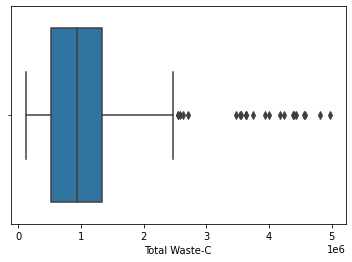

In [17]:
Outliers(waste_management)

#### To answer the hypothesis, and in order to continue the exploratory analysis, the following variables are calculated:  COLLECTION PER DAY, KG PER CAPITA, PROCESSED WASTE & NOT PROCESSED WASTE    

In [18]:
   
waste_management = analysis_tonsday(waste_management)
waste_management.head(3)

,Autonomous communities,Year,GDP,Population,GDP per capita,Domestic Waste and Wheelie Bins -C,Bulk -C,Metallics waste-C,Waste Glass-C,Waste Paper and Cardboard-C,...,Total Waste-C,Recycling collection-D,Mixed Recovered Mater-D,Composting/anaerobic digestion FORS-D,Composting/anaerobic digestion-D,Incinerated-D,Landfill of rejects,Landfill without pre-treatment-D,Total Waste disposal (tn)-D,Total(tons/day)
0,ANDALUCÍA,2010,144752225,8370975,17292.16,4213174,155836,11203,82031,136017,...,4974949,362002.125,146473.125,37339.1875,625062.6875,0.0,2308242.875,486450.6875,3.965571e+06,13630.00
1,ANDALUCÍA,2016,148405362,8388107,17692.35,3545590,361986,4425,99622,101816,...,4395591,412.818,166.217,45.5720,685.7340,0.0,2404796.000,59965.0000,4.314787e+06,12042.72
2,ANDALUCÍA,2012,138007226,8449985,16332.25,4134974,99589,7185,76114,111678,...,4809414,357865.500,144930.500,37219.7500,620111.7500,0.0,2314553.500,479534.7500,3.954216e+06,13176.48


In [19]:
 
waste_management = analysis_kg_percapita(waste_management)
waste_management.head(3)

,Autonomous communities,Year,GDP,Population,GDP per capita,Domestic Waste and Wheelie Bins -C,Bulk -C,Metallics waste-C,Waste Glass-C,Waste Paper and Cardboard-C,...,Recycling collection-D,Mixed Recovered Mater-D,Composting/anaerobic digestion FORS-D,Composting/anaerobic digestion-D,Incinerated-D,Landfill of rejects,Landfill without pre-treatment-D,Total Waste disposal (tn)-D,Total(tons/day),Per Capita(kg/capita/day)
0,ANDALUCÍA,2010,144752225,8370975,17292.16,4213174,155836,11203,82031,136017,...,362002.125,146473.125,37339.1875,625062.6875,0.0,2308242.875,486450.6875,3.965571e+06,13630.00,0.59
1,ANDALUCÍA,2016,148405362,8388107,17692.35,3545590,361986,4425,99622,101816,...,412.818,166.217,45.5720,685.7340,0.0,2404796.000,59965.0000,4.314787e+06,12042.72,0.52
2,ANDALUCÍA,2012,138007226,8449985,16332.25,4134974,99589,7185,76114,111678,...,357865.500,144930.500,37219.7500,620111.7500,0.0,2314553.500,479534.7500,3.954216e+06,13176.48,0.57


In [20]:

analysis_processed_waste(waste_management)
waste_management.head(3)

,Autonomous communities,Year,GDP,Population,GDP per capita,Domestic Waste and Wheelie Bins -C,Bulk -C,Metallics waste-C,Waste Glass-C,Waste Paper and Cardboard-C,...,Mixed Recovered Mater-D,Composting/anaerobic digestion FORS-D,Composting/anaerobic digestion-D,Incinerated-D,Landfill of rejects,Landfill without pre-treatment-D,Total Waste disposal (tn)-D,Total(tons/day),Per Capita(kg/capita/day),Processed_waste
0,ANDALUCÍA,2010,144752225,8370975,17292.16,4213174,155836,11203,82031,136017,...,146473.125,37339.1875,625062.6875,0.0,2308242.875,486450.6875,3.965571e+06,13630.00,0.59,1170877.12
1,ANDALUCÍA,2016,148405362,8388107,17692.35,3545590,361986,4425,99622,101816,...,166.217,45.5720,685.7340,0.0,2404796.000,59965.0000,4.314787e+06,12042.72,0.52,1850026.00
2,ANDALUCÍA,2012,138007226,8449985,16332.25,4134974,99589,7185,76114,111678,...,144930.500,37219.7500,620111.7500,0.0,2314553.500,479534.7500,3.954216e+06,13176.48,0.57,1160127.50


In [21]:
analysis_not_processed_waste(waste_management)
waste_management.head(3)

,Autonomous communities,Year,GDP,Population,GDP per capita,Domestic Waste and Wheelie Bins -C,Bulk -C,Metallics waste-C,Waste Glass-C,Waste Paper and Cardboard-C,...,Composting/anaerobic digestion FORS-D,Composting/anaerobic digestion-D,Incinerated-D,Landfill of rejects,Landfill without pre-treatment-D,Total Waste disposal (tn)-D,Total(tons/day),Per Capita(kg/capita/day),Processed_waste,Not Processed_waste
0,ANDALUCÍA,2010,144752225,8370975,17292.16,4213174,155836,11203,82031,136017,...,37339.1875,625062.6875,0.0,2308242.875,486450.6875,3.965571e+06,13630.00,0.59,1170877.12,2794693.56
1,ANDALUCÍA,2016,148405362,8388107,17692.35,3545590,361986,4425,99622,101816,...,45.5720,685.7340,0.0,2404796.000,59965.0000,4.314787e+06,12042.72,0.52,1850026.00,2464761.00
2,ANDALUCÍA,2012,138007226,8449985,16332.25,4134974,99589,7185,76114,111678,...,37219.7500,620111.7500,0.0,2314553.500,479534.7500,3.954216e+06,13176.48,0.57,1160127.50,2794088.25


#### 6.2 EXAMINE THE DISTRIBUTION OF THE VARIABLES 
#### The objective of this project is to analyse solid waste management in the Spanish Autonomous Communities and to verify the relationship with economic and population growth. 

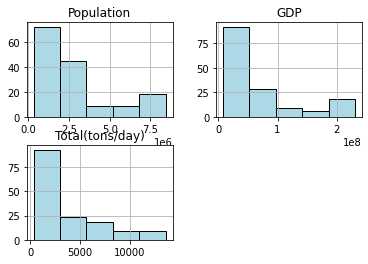

array([[<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'GDP'}>],
       [<AxesSubplot:title={'center':'Total(tons/day)'}>,
        <AxesSubplot:title={'center':'Distribution of economical variables'}>]],
      dtype=object)

In [22]:
econo_distribution(waste_management)

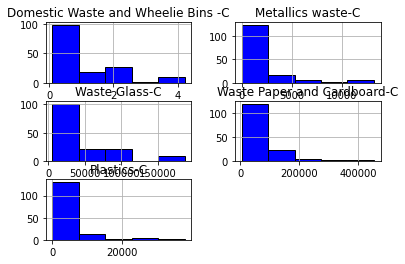

array([[<AxesSubplot:title={'center':'Domestic Waste and Wheelie Bins -C'}>,
        <AxesSubplot:title={'center':'Metallics waste-C'}>],
       [<AxesSubplot:title={'center':'Waste Glass-C'}>,
        <AxesSubplot:title={'center':'Waste Paper and Cardboard-C'}>],
       [<AxesSubplot:title={'center':'Plastics-C'}>,
        <AxesSubplot:title={'center':'Distribution of collection variables'}>]],
      dtype=object)

In [23]:
collection_distribution(waste_management)

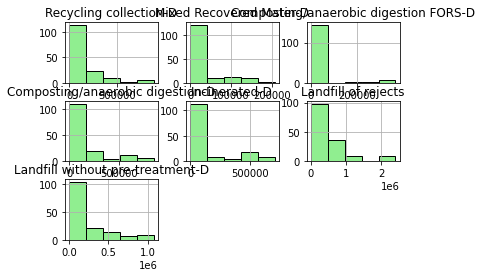

array([[<AxesSubplot:title={'center':'Recycling collection-D'}>,
        <AxesSubplot:title={'center':'Mixed Recovered Mater-D'}>,
        <AxesSubplot:title={'center':'Composting/anaerobic digestion FORS-D'}>],
       [<AxesSubplot:title={'center':'Composting/anaerobic digestion-D'}>,
        <AxesSubplot:title={'center':'Incinerated-D'}>,
        <AxesSubplot:title={'center':'Landfill of rejects'}>],
       [<AxesSubplot:title={'center':'Landfill without pre-treatment-D'}>,
        <AxesSubplot:>,
        <AxesSubplot:title={'center':'Distribution of disposal variables'}>]],
      dtype=object)

In [24]:
disposal_distribution(waste_management)

### Explore numerical features 

#### Distribution of key variables
#### The following have been selected as main or explanatory variables: Total Waste-C,'Per Capita(kg/capita/day)', 'Processed_waste', 'Not Processed_waste'  

C:\Users\Mary\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


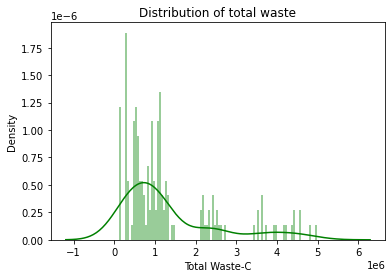

<AxesSubplot:title={'center':'Distribution of total waste'}, xlabel='Total Waste-C', ylabel='Density'>

In [25]:
distribution_totalwaste(waste_management)

C:\Users\Mary\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


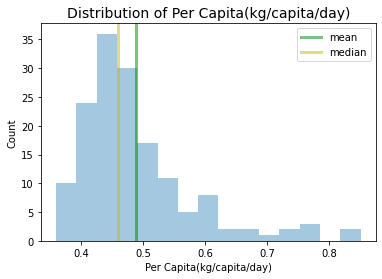

<AxesSubplot:title={'center':'Distribution of Per Capita(kg/capita/day)'}, xlabel='Per Capita(kg/capita/day)', ylabel='Count'>

In [26]:
#Las variables mas importantes son la distribucion de recoleccion de basura y la de disposicion 

distribution_kgpercapita(waste_management)


<AxesSubplot:xlabel='Processed_waste', ylabel='Density'>

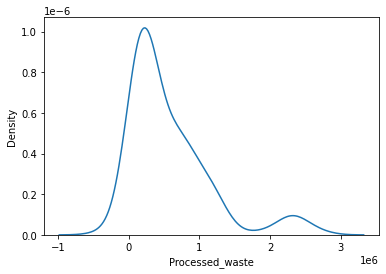

In [27]:
processed_waste(waste_management)

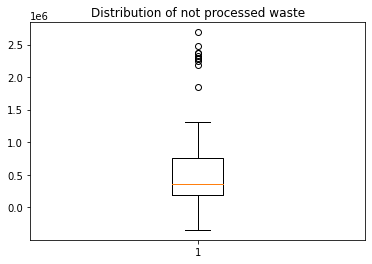

{'whiskers': [<matplotlib.lines.Line2D at 0x22b90749688>,
 'caps': [<matplotlib.lines.Line2D at 0x22b90749ac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x22b907491c8>],
 'medians': [<matplotlib.lines.Line2D at 0x22b9073a188>],
 'fliers': [<matplotlib.lines.Line2D at 0x22b90749788>],
 'means': []}

In [28]:
not_processed_waste(waste_management)

#### Bi-Variate Analysis

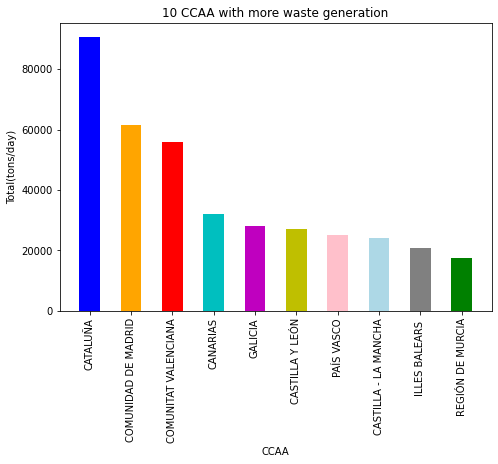

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

In [29]:
most_generation_graph(waste_management).show

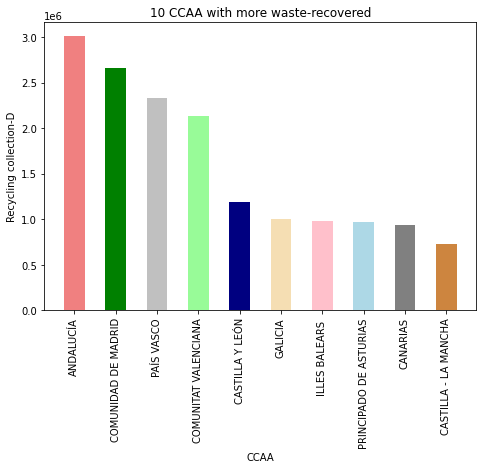

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

In [46]:
most_disposal_graph(waste_management).show

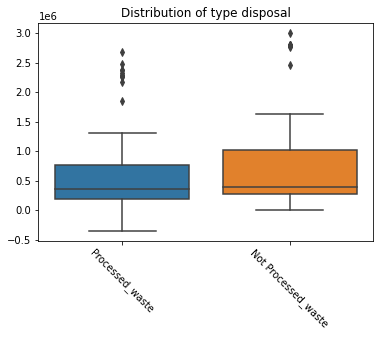

<AxesSubplot:title={'center':'Distribution of type disposal'}>

In [31]:
graph_analysis_disposal(waste_management)

### CORRELATION ANALYSIS
#### Correlation is a type of association between two numerical variables, specifically it assesses the trend (increasing or decreasing) in the data. For this project, it has been hypothesised that the growth of waste generation may be related to population growth and economic growth, which will be proved or disproved at the end of this project.

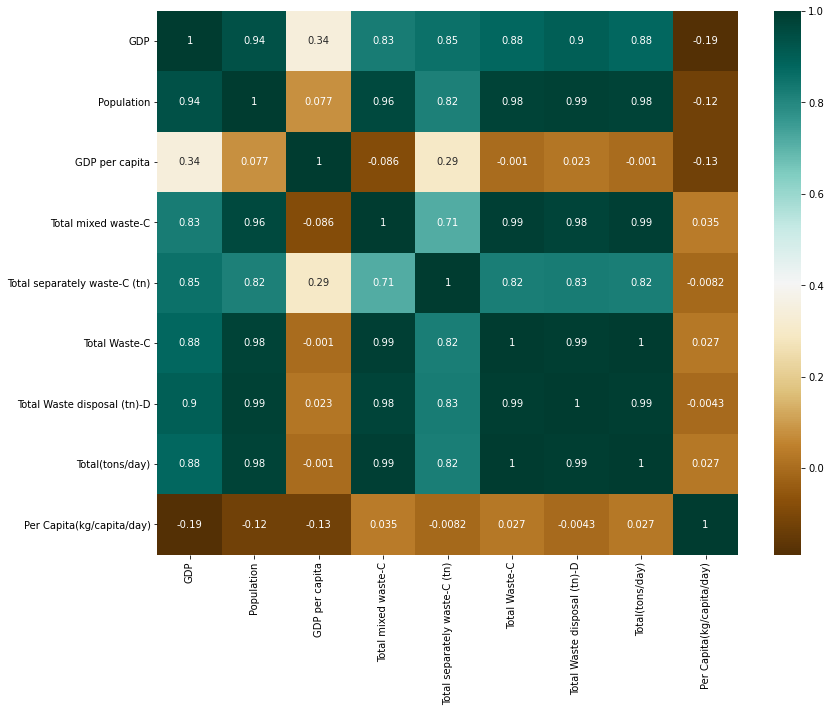

<bound method Figure.show of <Figure size 936x720 with 2 Axes>>

In [32]:

correlation_variables(waste_management).show

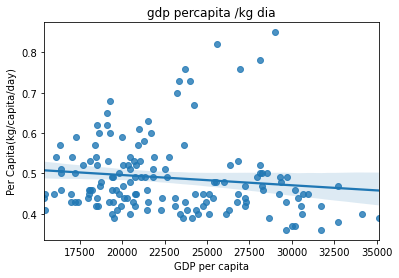

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

In [33]:
correlation_gdp_kg(waste_management).show

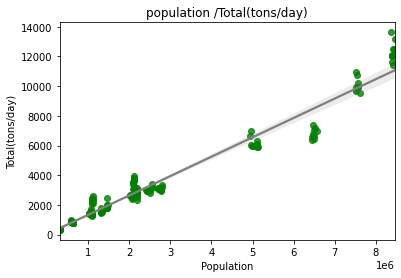

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

In [34]:
correlation_pop_tn(waste_management).show

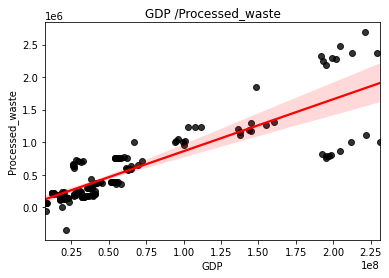

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

In [35]:
correlation_disposal(waste_management).show

### TIME SERIES ANALYSIS  

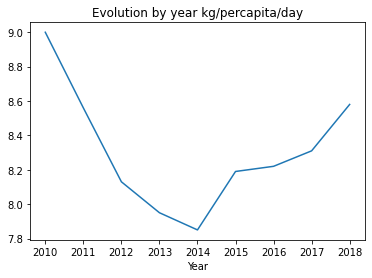

<AxesSubplot:title={'center':'Evolution by year kg/percapita/day'}, xlabel='Year'>

In [36]:
time_kgperday(waste_management)

c:\Users\Mary\Desktop\BootCamp\Python\MaryC-MezaR\data_science_bootcamp_2021\Waste_Management_EDA_proyect\src\utils\visualization_tb.py:167: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  timeserie_collec = waste_management.groupby('Year')['Metallics waste-C', 'Waste Glass-C', 'Waste Paper and Cardboard-C', 'Plastics-C',
No handles with labels found to put in legend.


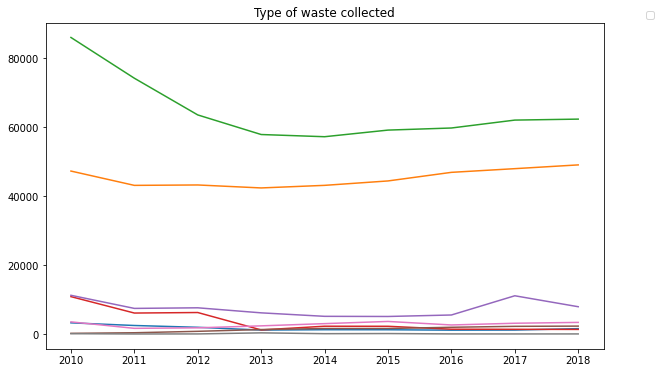

<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

In [47]:
 time_collected(waste_management).show

c:\Users\Mary\Desktop\BootCamp\Python\MaryC-MezaR\data_science_bootcamp_2021\Waste_Management_EDA_proyect\src\utils\visualization_tb.py:159: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  timeserie_dispo = waste_management.groupby('Year')['Processed_waste', 'Not Processed_waste'].mean()


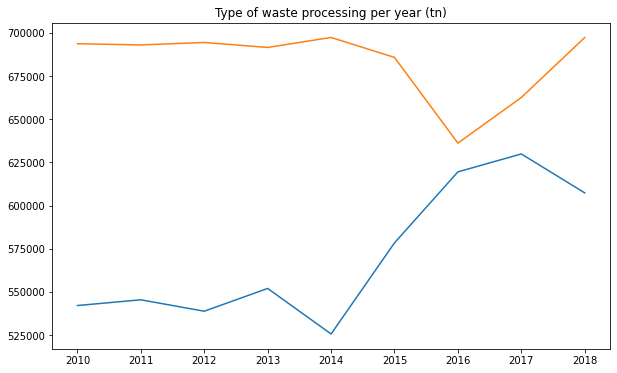

<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

In [49]:
time_disposal(waste_management).show

No handles with labels found to put in legend.


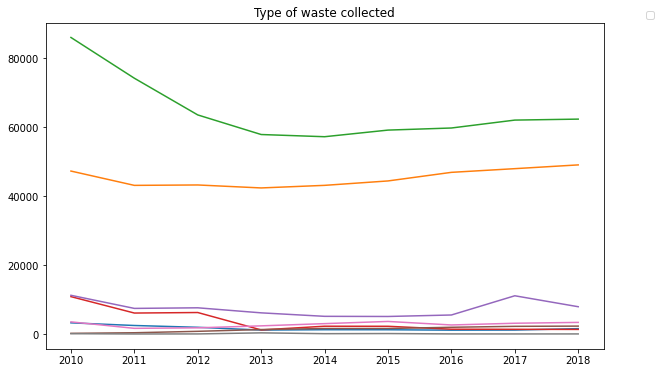

<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

In [39]:
time_collected(waste_management).show

c:\Users\Mary\Desktop\BootCamp\Python\MaryC-MezaR\data_science_bootcamp_2021\Waste_Management_EDA_proyect\src\utils\visualization_tb.py:177: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  timeserie_disposaltype = waste_management.groupby('Year')['Recycling collection-D', 'Mixed Recovered Mater-D',
No handles with labels found to put in legend.


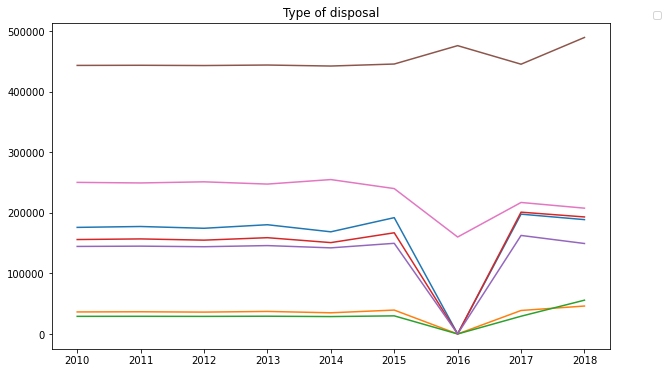

<bound method Figure.show of <Figure size 720x432 with 1 Axes>>

In [40]:
time_typedisposal(waste_management).show

### 6. SAVE DATA

In [41]:
save_csv(waste_management)

In [42]:
save_excel(waste_management)

In [43]:
waste_management.columns 

Index(['Autonomous communities', 'Year', 'GDP', 'Population', 'GDP per capita',
       'Domestic Waste and Wheelie Bins -C', 'Bulk -C', 'Metallics waste-C',
       'Waste Glass-C', 'Waste Paper and Cardboard-C', 'Plastics-C',
       'Waste Wood-C', 'Textile waste-C', 'Electrical waste-C', 'Battery-C',
       'Animal-C', 'Mixed packaging-C', 'Sludge-C', 'Construction-C',
       'Others-C', 'Total mixed waste-C', 'Total separately waste-C (tn)',
       'Total Waste-C', 'Recycling collection-D', 'Mixed Recovered Mater-D',
       'Composting/anaerobic digestion FORS-D',
       'Composting/anaerobic digestion-D', 'Incinerated-D',
       'Landfill of rejects', 'Landfill without pre-treatment-D',
       'Total Waste disposal (tn)-D', 'Total(tons/day)',
       'Per Capita(kg/capita/day)', 'Processed_waste', 'Not Processed_waste'],
      dtype='object')

In [44]:

save_json(waste_management)


#### TIME SPENT ON PROJECT 

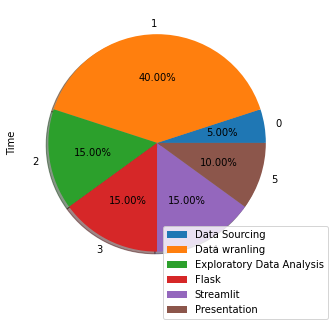

<AxesSubplot:ylabel='Time'>

In [45]:
spent_time()